## Exercise 16.14

In [16]:
import matplotlib.pyplot as plt
from pylab import *
import networkx as nx
import random as rd
plt.style.use('ggplot')

n = 30 # number of nodes
k = 4 # number of neighbors of each node

def initialize():
    global g
    g = nx.grid_graph(dim=(5, 6))
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)
    plt.show()

def update():
    global g
    g.count += 1

    nds = list(g.nodes)
    i = rd.choice(nds) # nodes to rewire 
    if g.degree[i] > 0:
        g.remove_edge(i, rd.choice(list(g.neighbors(i))))
        nds.remove(i)
        for j in g.neighbors(i):
            nds.remove(j)
        g.add_edge(i, rd.choice(nds))

    # simulating of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

In [17]:
initialize()

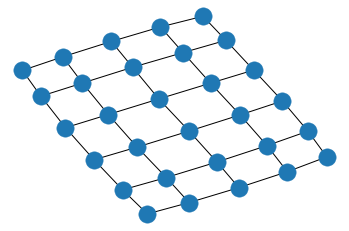

In [18]:
observe()

In [19]:
update()

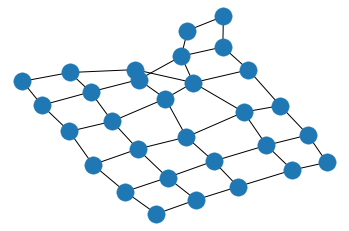

In [20]:
observe()

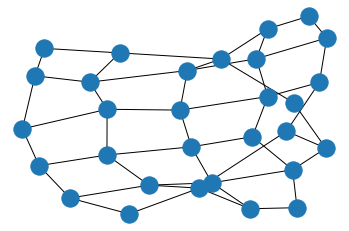

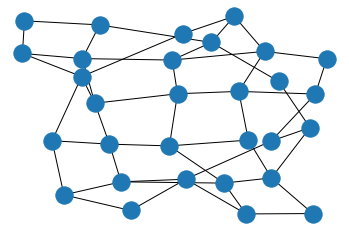

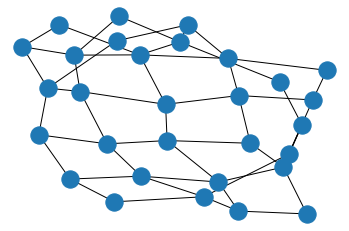

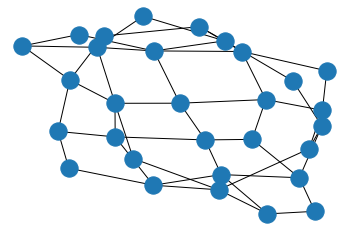

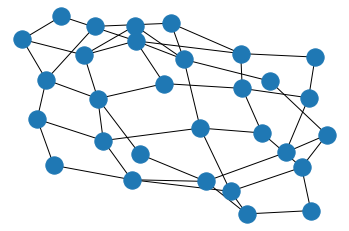

In [8]:
for _ in range(5):
    update()
    observe()

The original lattic structure is missed during the update process, as nodes are randomly connects its new neighbors, the structure become complicated after 5 steps. 

## Exercise 16.15

In [11]:
m0 = 5 # number of nodes in initial condition

def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)
    plt.show()

def pref_select(nds):
    global g
    r = uniform(0, sum(g.degree(i) for i in nds))
    x=0
    for i in nds:
        x += g.degree[i]
        if r <= x:
            return i

def update(nT):
    global g
    g.count += 1
    nds = list(g.nodes)
    newcomer = max(nds) + 1
    for i in range(nT):
        j = pref_select(nds)
        g.add_edge(newcomer, j)
        nds.remove(j)
    g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

In [12]:
def sim(nT):
    initialize()
    observe()
    for _ in range(5):
        update(nT)
        observe()

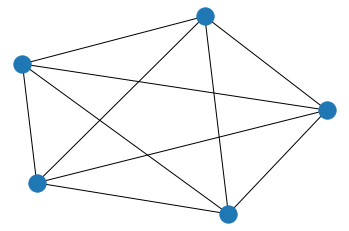

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


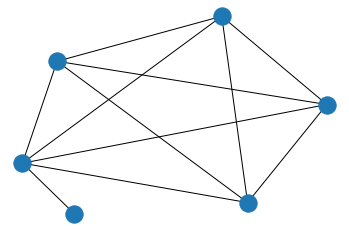

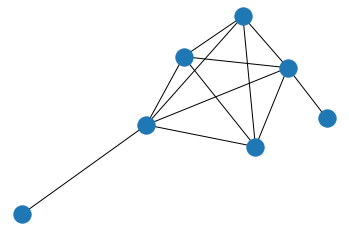

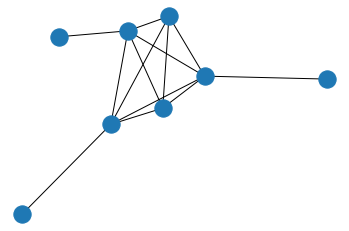

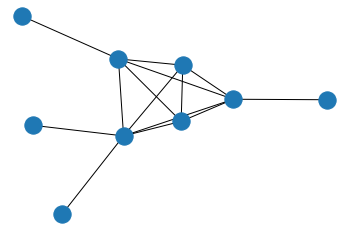

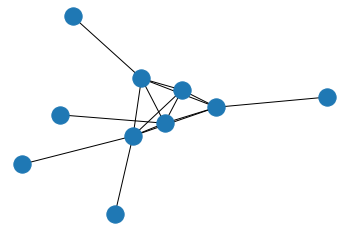

In [13]:
sim(1)


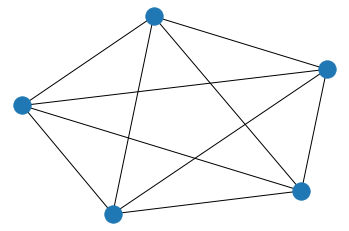

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


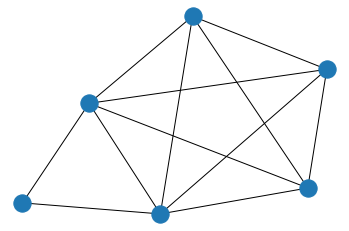

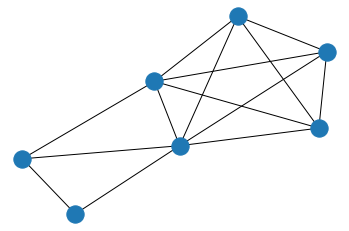

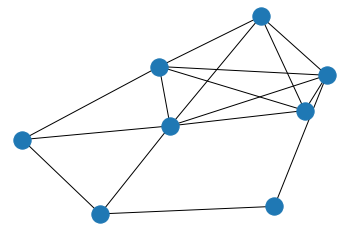

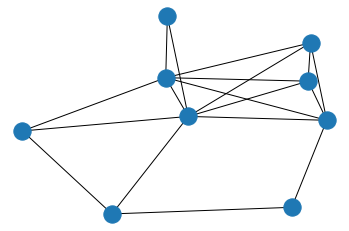

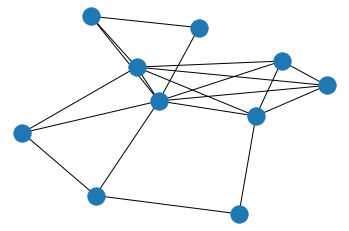

In [14]:
sim(2)

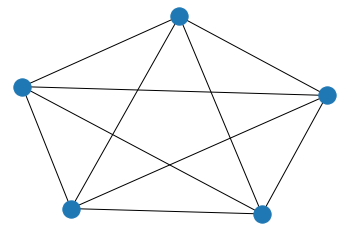

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


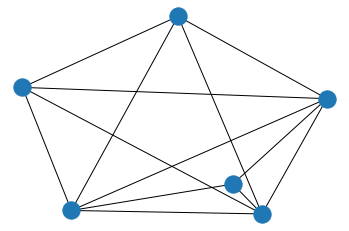

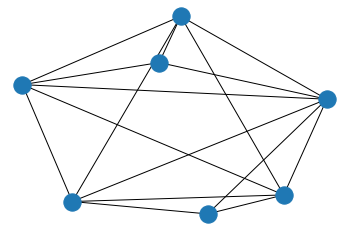

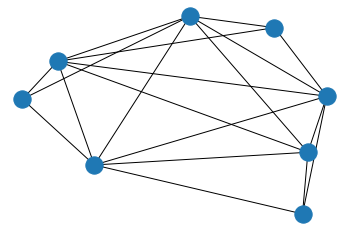

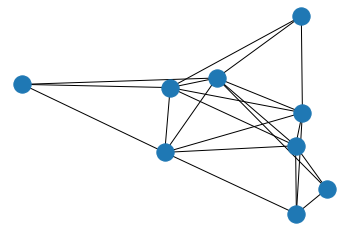

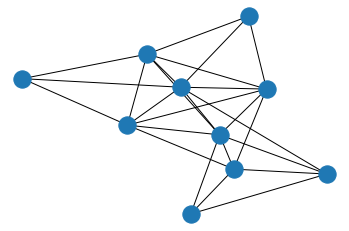

In [15]:
sim(3)